# Audio Classification Using Machine Learning
##### dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = 'dog_bark.wav'

In [3]:
import IPython.display as ipd
import librosa

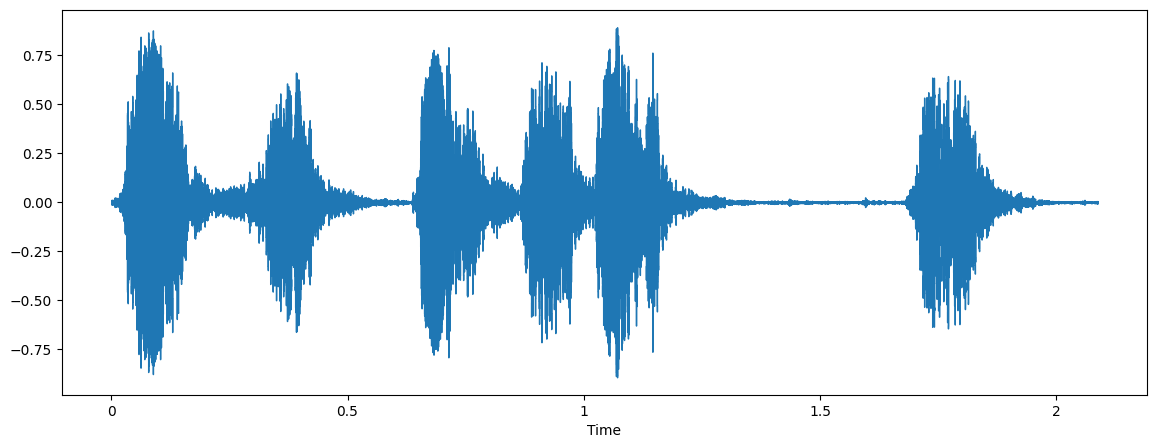

In [4]:
# Dog Sound
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [5]:
sample_rate

22050

### What is sample rate?
The sample rate in sound refers to the **number of times per second that a sound wave is captured and converted into digital data**. It is **measured in Hertz (Hz) or Kilohertz (kHz)**. The sample rate determines the **quality of the digital audio** and the **level of detail** that can be captured.

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate

44100

### Librosa will convert any file to sample rate of 22050 like we can see in case of dog_bark.wav file
Set `librosa.load(filename, sr=None)` to avoid that

In [7]:
wave_audio

array([[316, -23],
       [310, -46],
       [287, -70],
       ...,
       [-39, -61],
       [-37, -48],
       [-36, -36]], dtype=int16)

In [8]:
data

array([ 0.0032611 ,  0.00372985,  0.00187421, ..., -0.00187398,
       -0.00162695, -0.00136397], dtype=float32)

**Data in librosa is getting normalized from -1 to 1** But in case of scipy.io wavefile it's **not!**

In [9]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [10]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

### Extract Features

Here we will be using **Mel-Frequency Cepstral Coefficients(MFCC)*** from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [11]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 90)


In [12]:
mfccs

array([[-2.97781555e+02, -1.22282936e+02, -6.27358208e+01, ...,
        -4.29671753e+02, -4.31433716e+02, -4.35160004e+02],
       [ 1.60979919e+02,  1.56559021e+02,  1.30547501e+02, ...,
         6.70549622e+01,  7.41709900e+01,  7.57267761e+01],
       [ 1.24262638e+01, -4.64375381e+01, -6.49818573e+01, ...,
         1.08614359e+01,  3.23038216e+01,  4.57316589e+01],
       ...,
       [ 2.06900835e+00,  4.51872158e+00,  2.26543593e+00, ...,
         1.74498653e+00, -3.59009886e+00, -3.93753082e-01],
       [ 5.37694931e+00,  7.49645233e-02, -6.83737469e+00, ...,
        -9.79442298e-02, -9.69570339e-01,  4.45968866e-01],
       [ 2.11204481e+00, -5.06761909e-01,  1.37050104e+00, ...,
        -1.73340392e+00,  1.59162045e-01, -9.25073028e-01]], dtype=float32)

In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

audio_dataset_path='UrbanSound8K/audio/'
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [02:12, 27.20it/s]C:\Users\Gigar\anaconda3\envs\py39\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [04:59, 36.66it/s]C:\Users\Gigar\anaconda3\envs\py39\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Gigar\anaconda3\envs\py39\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:12, 27.93it/s]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [16]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [20]:
### Label Encoding
### y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641270e-01,  7.33490765e-01,  7.11009264e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181704e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6985, 40), (6985, 10), (1747, 40), (1747, 10))

## Model Creation

In [24]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
## No of class
num_labels = y.shape[1]

In [37]:
model = Sequential()
## 1 layer
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 2 layer
model.add(Dense(2000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## 3 layer
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               4100      
                                                                 
 activation_7 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 2000)              202000    
                                                                 
 activation_8 (Activation)   (None, 2000)              0         
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)             

In [39]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
213/219 [============================>.] - ETA: 0s - loss: 5.1966 - accuracy: 0.2170
Epoch 1: val_loss improved from inf to 1.90880, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 5.1176 - accuracy: 0.2185 - val_loss: 1.9088 - val_accuracy: 0.3578
Epoch 2/500
195/219 [=========================>....] - ETA: 0s - loss: 2.0190 - accuracy: 0.2845
Epoch 2: val_loss improved from 1.90880 to 1.70321, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.0005 - accuracy: 0.2902 - val_loss: 1.7032 - val_accuracy: 0.4196
Epoch 3/500
202/219 [==========================>...] - ETA: 0s - loss: 1.8155 - accuracy: 0.3547
Epoch 3: val_loss improved from 1.70321 to 1.52425, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.8078 - accuracy: 0.3581 - val_loss: 1.5243 - val_accuracy: 0.5135

In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy)

[0.6209828853607178, 0.8128219842910767]


In [43]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673635  ,  -29.164494  ,  -18.950253  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630232  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009955  ,    0.5334609 ,  -23.84339   ,
        -15.267322  ,    9.245734  ,   10.367627  ,   -0.58320117,
         -1.2624055 ,   17.700018  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [45]:
predictions = model.predict(X_test)
predictions

55/55 [==============================] - 0s 3ms/step


array([[1.63429570e-09, 3.61193173e-07, 1.31756860e-06, ...,
        2.78656264e-15, 3.52441951e-08, 1.13062815e-05],
       [1.70540603e-04, 2.48865504e-02, 2.23734067e-03, ...,
        8.75130127e-07, 1.18107498e-02, 3.42978120e-01],
       [6.18128695e-07, 2.64118658e-04, 4.23647471e-05, ...,
        7.19988078e-04, 2.87379691e-04, 7.29514798e-03],
       ...,
       [1.74358639e-17, 9.99998808e-01, 2.53141773e-13, ...,
        8.67551555e-25, 3.47264266e-11, 1.21171672e-06],
       [7.94220939e-02, 6.39224704e-03, 4.65378642e-01, ...,
        1.10615389e-02, 1.68539565e-02, 2.37615407e-01],
       [3.60894762e-02, 1.01673547e-02, 3.03618968e-01, ...,
        8.33451282e-04, 7.86668509e-02, 1.86767936e-01]], dtype=float32)

In [46]:
predicted_classes = np.argmax(predictions, axis=-1)
predicted_classes

array([5, 4, 4, ..., 1, 2, 2], dtype=int64)

## Testing Some Test Audio Data
Steps
   - Preprocess the new audio data
   - predict the classes
   - Invere transform your Predicted Label


In [48]:
filename="UrbanSound8K/horn.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted=model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-315.6028       94.854805    -37.22234      46.778263     -6.7286925
   10.012548     -1.6075526    18.51134     -11.9006195     7.594035
   -7.8546596    11.362425    -15.617317      3.3019907   -11.958161
    6.3534894    -5.587026     20.78539      -0.46922818    6.0436325
  -11.619548      2.868675    -10.176432      8.332485      1.7765608
    2.5638974   -14.761061      1.1465563     3.783566      3.1094651
  -12.185812     -3.0522912     3.7284145     8.962753      0.9306451
    3.1800795     2.485049      0.6138644   -11.449189     -6.0105853 ]
[[-315.6028       94.854805    -37.22234      46.778263     -6.7286925
    10.012548     -1.6075526    18.51134     -11.9006195     7.594035
    -7.8546596    11.362425    -15.617317      3.3019907   -11.958161
     6.3534894    -5.587026     20.78539      -0.46922818    6.0436325
   -11.619548      2.868675    -10.176432      8.332485      1.7765608
     2.5638974   -14.761061      1.1465563     3.783566      3.1094651
   -12.185812   

array(['car_horn'], dtype='<U16')